Notebook to get seasonally adjusted employment rate (aged 16-64) for the UK from the Office for National Statistics API

In [1]:
#import json
import json
# import pandas
import pandas as pd
#import requests
import requests
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# set to plot automatically
%matplotlib inline
# set font size of charts
sns.set(font_scale=2)

First we are going to request the data from the Office for National Statistics API. Information on the API is available here: https://developer.ons.gov.uk/office-for-national-statistics-api/reference

# Request data

In [2]:
# set the url link
url_link=('https://api.ons.gov.uk/dataset/LMS/timeseries/LF24/data')
# set the headers so the connection closes
headers = {'Connection':'close'}
# request the data from the link
result = requests.get(url_link, headers=headers)
# get the results as a python dictionary
data = result.json()

# Clean data

In [3]:
# print the dictionary keys
print(data.keys())

dict_keys(['alerts', 'uri', 'months', 'relatedDatasets', 'years', 'relatedDocuments', 'relatedData', 'type', 'sourceDatasets', 'section', 'quarters', 'description', 'versions', 'notes'])


In [4]:
# save data from months key to dataframe
df=pd.DataFrame(data.get('months'))

In [5]:
# set value to numeric
df['value']=pd.to_numeric(df['value'])

In [6]:
# convert date to datetime
df['date']=pd.to_datetime(df['date'])
# rename date column so capatili
df.rename(columns={'date':'Date'}, inplace=True)
# set index to date
df.set_index('Date',inplace=True)

# Explore data

In [7]:
# show head
df.head()

,label,month,quarter,sourceDataset,updateDate,value,year
Date,,,,,,,
1971-02-01,1971 JAN-MAR,February,,LMS,2015-10-13T23:00:00.000Z,72.2,1971
1971-03-01,1971 FEB-APR,March,,LMS,2015-10-13T23:00:00.000Z,72.1,1971
1971-04-01,1971 MAR-MAY,April,,LMS,2015-10-13T23:00:00.000Z,72.0,1971
1971-05-01,1971 APR-JUN,May,,LMS,2015-10-13T23:00:00.000Z,72.0,1971
1971-06-01,1971 MAY-JUL,June,,LMS,2015-10-13T23:00:00.000Z,71.9,1971


In [8]:
# show tail
df.tail()

,label,month,quarter,sourceDataset,updateDate,value,year
Date,,,,,,,
2017-07-01,2017 JUN-AUG,July,,LMS,2017-10-17T23:00:00.000Z,75.1,2017
2017-08-01,2017 JUL-SEP,August,,LMS,2017-11-15T00:00:00.000Z,75.0,2017
2017-09-01,2017 AUG-OCT,September,,LMS,2017-12-13T00:00:00.000Z,75.1,2017
2017-10-01,2017 SEP-NOV,October,,LMS,2018-01-24T00:00:00.000Z,75.3,2017
2017-11-01,2017 OCT-DEC,November,,LMS,2018-02-21T00:00:00.000Z,75.2,2017


# Visualize data

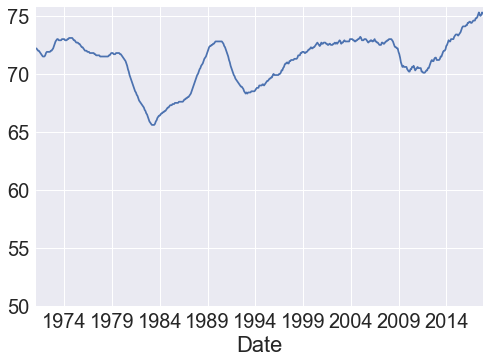

In [9]:
# plot data
df.plot(legend=False,ylim=50);